In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.

In [2]:
import json

with open('injury_data_dict.json', 'r', encoding='utf-8') as fp:
    injury_data_dict = json.load(fp)

In [3]:
inj_list = []

acc = 0

for ldict in injury_data_dict.values():
    for pname, plist in ldict.items():
        for inj in plist:
            day_str = inj['days'].split()[0]
            try:
                num = int(day_str)
            except ValueError:
                print(f"球员{pname}存在异常的days值: {inj['days']}")
                acc += 1
                continue
            inj_list.append((inj['injury'], num))

print('总共出现异常值', acc, '次')
del acc
inj_list

球员Jaden Philogene存在异常的days值: ? days
总共出现异常值 1 次


[('Hip problems', 13),
 ('Abdominal problems', 17),
 ('unknown injury', 10),
 ('unknown injury', 22),
 ('Eyebow fracture', 76),
 ('Muscle injury', 27),
 ('Knee injury', 8),
 ('Virus', 17),
 ('Ill', 9),
 ('Ill', 7),
 ('muscular problems', 17),
 ('Facial injury', 3),
 ('Meniscus injury', 30),
 ('Corona virus', 15),
 ('influenza', 8),
 ('Internal ligament strain', 28),
 ('Eye injury', 5),
 ('Hip bruise', 4),
 ('Rib fracture', 54),
 ('Virus', 68),
 ('unknown injury', 17),
 ('unknown injury', 9),
 ('muscle stiffness', 5),
 ('Hip injury', 15),
 ('unknown injury', 30),
 ('Calf injury', 33),
 ('Hamstring injury', 25),
 ('Knock', 40),
 ('Ankle injury', 11),
 ('Appendectomy', 29),
 ('Foot surgery', 84),
 ('muscle stiffness', 5),
 ('Muscle injury', 25),
 ('unknown injury', 17),
 ('Hamstring injury', 35),
 ('Calf injury', 13),
 ('Hamstring injury', 21),
 ('Hamstring muscle injury', 13),
 ('Hamstring injury', 78),
 ('Hamstring injury', 20),
 ('Groin strain', 10),
 ('Groin injury', 13),
 ('Head inju

由于这里的异常days值只有一个，我们直接将其舍弃以保证类型统一，免得后续还要清洗。

In [4]:
len(inj_list)

18745

In [5]:
from collections import defaultdict

# 生成数据列表的字典
d_dict = defaultdict(list)
for injury, value in inj_list:
    d_dict[injury].append(value)

d_dict

defaultdict(list,
            {'Hip problems': [13,
              9,
              23,
              4,
              57,
              15,
              68,
              15,
              3,
              17,
              17,
              18,
              43,
              9,
              46,
              22,
              11,
              6,
              75,
              8,
              8,
              14,
              3,
              7,
              14,
              4,
              106,
              8,
              32,
              19,
              8,
              22,
              10,
              13,
              5,
              107,
              20,
              11,
              12,
              5,
              80,
              13,
              8,
              8,
              20,
              4,
              13,
              23,
              6,
              4,
              17,
              67,
              4,
              8,
             

In [6]:
pd.set_option('display.max_rows', None)

s = pd.Series(inj_list)
vc = s.value_counts()

df = vc.reset_index()
df.columns = ['injury', 'frequency']

df

injury  frequency
0                                              (Ill, 4)        106
1                                (muscular problems, 8)        104
2                                     (Corona virus, 8)         98
3                                              (Ill, 8)         86
4                                    (Corona virus, 15)         85
5                                              (Ill, 3)         82
6                                   (unknown injury, 6)         81
7                                              (Ill, 5)         80
8                                   (unknown injury, 5)         78
9                                (muscular problems, 5)         78
10                                  (unknown injury, 8)         76
11                                             (Ill, 6)         71
12                                   (Corona virus, 11)         70
13                                            (Rest, 3)         70
14                               (muscular problems, 4)         60
15                                  (unknown injury, 7)         58
16                                  (unknown injury, 9)         57
17                                   (Corona virus, 12)         52
18                               (Hamstring injury, 15)         51
19                                  (unknown injury, 4)         50
20                                     (minor knock, 8)         50
21                                             (Ill, 7)         49
22                                           (Knock, 5)         49
23                                 (unknown injury, 10)         49
24                                   (Muscle injury, 8)         47
25                              (muscular problems, 12)         47
26                              (muscular problems, 15)         46
27                                    (Ankle injury, 8)         46
28                                    (Corona virus, 9)         45
29                                 (unknown injury, 14)         45
30                                 (unknown injury, 11)         44
31                               (Hamstring injury, 22)         44
32                                           (Knock, 8)         43
33                               (Hamstring injury, 24)         42
34                               (muscular problems, 6)         42
35                                  (Muscle injury, 22)         42
36                                  (Muscle injury, 15)         42
37                               (Hamstring injury, 29)         41
38                                     (minor knock, 4)         41
39                                           (Knock, 6)         40
40                               (muscular problems, 7)         39
41                                         (Fitness, 8)         39
42                              (muscular problems, 10)         39
43                                            (Rest, 4)         39
44                                 (unknown injury, 13)         37
45                                           (Knock, 7)         37
46                                       (influenza, 5)         37
47                                 (unknown injury, 12)         37
48                                   (Adductor pain, 8)         36
49                                  (Thigh problems, 8)         36
50                                  (Muscle injury, 19)         36
51                                 (unknown injury, 15)         36
52                               (Hamstring injury, 25)         36
53                                  (Muscle injury, 11)         35
54                               (Hamstring injury, 19)         35
55                                   (Corona virus, 13)         35
56                                             (flu, 4)         35
57                                   (Corona virus, 14)         34
58                               (Hamstring injury, 32)         34
59                           

In [7]:
df = pd.DataFrame([
    {
        'injury': injury,
        'frequency': len(values),
        'average/day': sum(values) / len(values),
        'max/day': max(values),
        'min/day': min(values),
        'std/day': np.std(values, ddof=0)  # 总体标准差
    }    
    for injury, values in d_dict.items()
])
        
pd.set_option('display.max_rows', None) # 显示所有行
df = df.sort_values(by='frequency', ascending=False).reset_index(drop=True)  # 按频率排序

df

injury  frequency  average/day  \
0                                  Hamstring injury       1334    38.322339   
1                                    unknown injury       1156    20.963668   
2                                     Muscle injury       1031    29.856450   
3                                 muscular problems        921    17.899023   
4                                      Ankle injury        751    39.368842   
5                                      Corona virus        701    12.948645   
6                                       Knee injury        669    51.263079   
7                                               Ill        639     7.984351   
8                                             Knock        585    17.434188   
9                                           Fitness        413    22.871671   
10                                   Thigh problems        402    22.572139   
11                                      Calf injury        395    29.731646   
12                                    Knee problems        361    19.409972   
13                                    Adductor pain        344    17.537791   
14                                Torn muscle fiber        308    31.168831   
15                                  Shoulder injury        298    47.543624   
16                                      Foot injury        254    40.366142   
17                                  Adductor injury        249    32.373494   
18                                   Muscle fatigue        248    11.330645   
19                                     Groin injury        227    31.889868   
20                           Cruciate ligament tear        227   227.920705   
21                                      minor knock        216     7.898148   
22                                         Dead leg        199    22.984925   
23                                   Ankle problems        181    15.906077   
24                                             Rest        180     3.966667   
25                                    Calf problems        178    18.595506   
26                          Hamstring muscle injury        175    29.605714   
27                                    Back problems        160    20.975000   
28                                        influenza        154     7.740260   
29                                 Hamstring strain        154    24.071429   
30                                           bruise        149    12.939597   
31                                     Ankle sprain        145    21.551724   
32                                              flu        135     5.955556   
33                                       Hip injury        134    32.365672   
34                                       Quarantine        133    10.180451   
35                              Injury to the ankle        131    30.702290   
36                                             cold        116     6.224138   
37                                      Back injury        115    43.608696   
38                                     Knee surgery        104   135.230769   
39                                      Head injury        104    13.288462   
40                                            Fever        100     5.870000   
41                              Metatarsal fracture         99    86.989899   
42                                       concussion         98    14.479592   
43                                      Stomach flu         90     5.655556   
44                                     ankle sprain         89    29.606742   
45                                  Meniscus injury         85    71.176471   
46                                        infection         84    10.666667   
47                                   Groin problems         81    22.419753   
48                                     Hip problems         81    19.135802   
49                                       Leg injury         76    30.039474   
50              

In [8]:
df.to_excel('./saved/injury_data.xlsx', index=False, engine='openpyxl')

现在就得到了伤病的统计，保存为xlsx

### 单个伤病的分析

现在我们可以查看令球员闻风丧胆的伤病——十字韧带撕裂的统计数据。

In [9]:
df[df['injury'] == 'Cruciate ligament tear']

injury  frequency  average/day  max/day  min/day  \
20  Cruciate ligament tear        227   227.920705      446       22   

      std/day  
20  73.101841

In [10]:
df[df['injury'].str.startswith('Cruciate ligament', na=False)]

injury  frequency  average/day  max/day  min/day  \
20      Cruciate ligament tear        227   227.920705      446       22   
73    Cruciate ligament injury         38   202.763158      404       29   
145  Cruciate ligament surgery         13   217.384615      313      124   
195   Cruciate ligament strain          6    38.000000       81       11   

        std/day  
20    73.101841  
73   105.503663  
145   50.114543  
195   25.199206

恢复时间为都在200天往上，可以说就是赛季报销了。

十字韧带的伤病类型有4种，把他们合并是不妥的。可以添加“伤病大类”一列，等下再说。

现在绘制回复时间的频率分布图，来让我们更清楚的认识伤病对球员的影响

In [11]:
data1 = d_dict['Cruciate ligament tear']

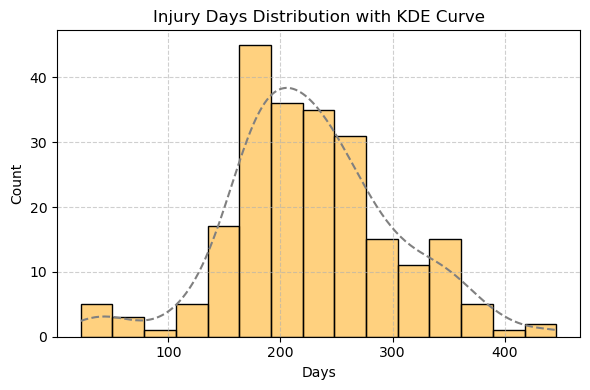

In [12]:
plt.figure(figsize=(6, 4))
ax = sns.histplot(data1, kde=True, bins=15, color='orange')

for line in ax.lines:
    line.set_color('gray')
    line.set_linestyle('--')

plt.title('Injury Days Distribution with KDE Curve')
plt.xlabel('Days')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(f"./saved/Cruciate ligament tear.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plt_injury_hfd(d_dict, inj, bins=15, figsize=(6, 4)):
    """
        plot the hystogram of frequency distribution of injury
    """
    data = d_dict[inj]
    
    plt.figure(figsize=figsize)
    ax = sns.histplot(data, kde=True, bins=bins, color='orange')
    for line in ax.lines:
        line.set_color('gray')
        line.set_linestyle('--')

    plt.title(f'"{inj}" Days Distribution with KDE Curve')
    plt.xlabel('Days')
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"./saved/{inj}.png", dpi=300, bbox_inches='tight')
    plt.show()

研究频率最高的腘绳肌伤病

In [14]:
df[df['injury'].str.startswith('Hamstring', na=False)]

injury  frequency  average/day  max/day  min/day  \
0          Hamstring injury       1334    38.322339      491        1   
26  Hamstring muscle injury        175    29.605714      168        6   
29         Hamstring strain        154    24.071429      126        1   

      std/day  
0   38.410251  
26  21.137616  
29  21.128889

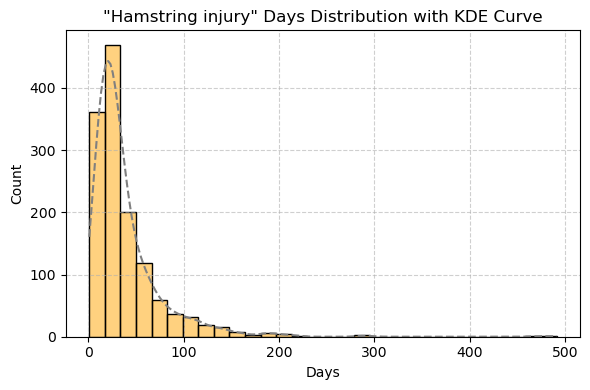

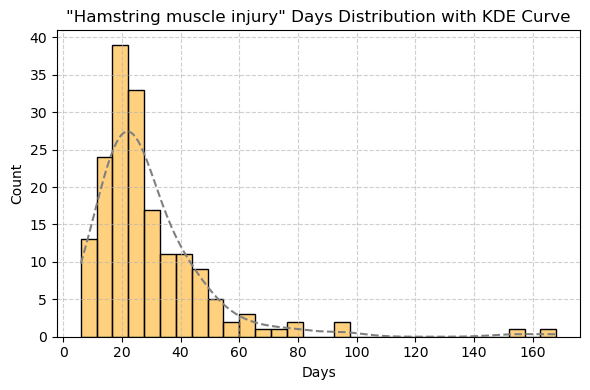

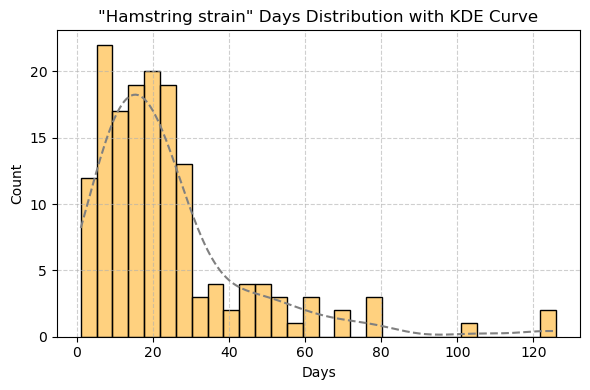

In [15]:
plt_injury_hfd(d_dict, 'Hamstring injury', 30)
plt_injury_hfd(d_dict, 'Hamstring muscle injury', 30)
plt_injury_hfd(d_dict, 'Hamstring strain', 30)

注意到有一个伤病名称叫做"unknown injury"，看似很神秘，我们研究一下

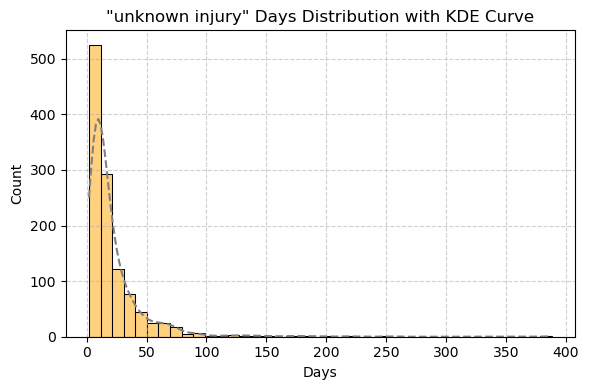

In [16]:
plt_injury_hfd(d_dict, 'unknown injury', 40)

Corona virus

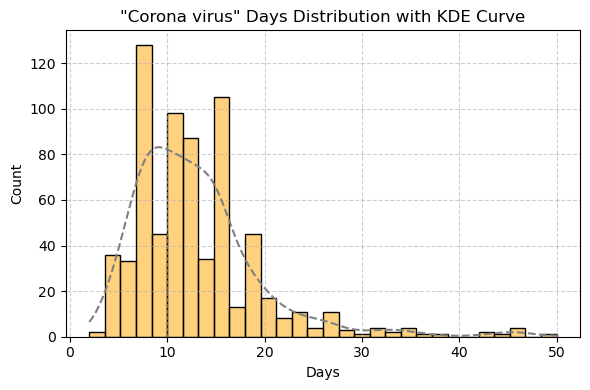

In [17]:
plt_injury_hfd(d_dict, 'Corona virus', 30)

<br>

### 整体分析

In [18]:
df.sort_values(by='average/day', ascending=False).reset_index(drop=True)

injury  frequency  average/day  \
0                            Cruciate ligament tear        227   227.920705   
1                          Compression of the spine          3   222.000000   
2                         Cruciate ligament surgery         13   217.384615   
3                         Tibia and fibula fracture          3   210.333333   
4                          Cruciate ligament injury         38   202.763158   
5                           Achilles tendon rupture         27   194.444444   
6                                  Cartilage damage         10   181.600000   
7                           Patellar tendon rupture          3   180.333333   
8                      Partial patellar tendon tear          2   173.000000   
9                                  Lymphatic cancer          3   171.333333   
10                          Achilles tendon surgery          9   170.888889   
11                                     Broken tibia          9   145.333333   
12                                   Broken kneecap          3   144.000000   
13                                       Broken leg          6   141.666667   
14                                     Knee surgery        104   135.230769   
15                                Bone inflammation          1   135.000000   
16          Partial damage to the cruciate ligament          5   133.000000   
17                                Testicular cancer          3   131.000000   
18                          Toe joint capsular tear          2   124.000000   
19                                           Cancer          1   117.000000   
20                                      Arthroscopy          5   115.800000   
21                              Torn knee ligaments         10   115.400000   
22                              Partial muscle tear          6   113.166667   
23                       Dislocation of the kneecap          3   111.666667   
24                                     Broken ankle         16   108.812500   
25          Dislocation fracture of the ankle joint          4   106.000000   
26                                   Tendon rupture         20   102.200000   
27                         Fracture of fibula shaft          3   100.666667   
28                  Hairline fracture in the fibula          4    99.250000   
29                                   Vein occlusion          1    97.000000   
30                                 Cyst in the knee          2    96.500000   
31                                    Broken fibula         38    94.842105   
32                                   heart problems         18    94.611111   
33                  Knee collateral ligament strain          2    92.500000   
34                                  Meniscus damage         15    90.666667   
35                                    Ankle surgery         39    89.769231   
36                              Metatarsal fracture         99    86.989899   
37                                          surgery         49    86.081633   
38                                     Foot surgery         16    85.687500   
39                                    Meniscus tear         33    85.181818   
40                                 fatigue fracture         10    84.600000   
41                                   Herniated disc          8    84.125000   
42                               Lower leg fracture          7    81.428571   
43                       Cervical vertebra fracture          2    79.500000   
44                                      Broken foot         30    78.733333   
45                         Patellar tendon problems         30    78.300000   
46                        Inner ankle ligament tear          5    75.200000   
47                           Peroneus tendon injury          3    72.666667   
48                        Syndesmotic ligament tear         36    71.555556   
49                       Patellar tendon irritation          8    71.375000   
50              

In [19]:
df['injury'].tolist()

['Hamstring injury',
 'unknown injury',
 'Muscle injury',
 'muscular problems',
 'Ankle injury',
 'Corona virus',
 'Knee injury',
 'Ill',
 'Knock',
 'Fitness',
 'Thigh problems',
 'Calf injury',
 'Knee problems',
 'Adductor pain',
 'Torn muscle fiber',
 'Shoulder injury',
 'Foot injury',
 'Adductor injury',
 'Muscle fatigue',
 'Groin injury',
 'Cruciate ligament tear',
 'minor knock',
 'Dead leg',
 'Ankle problems',
 'Rest',
 'Calf problems',
 'Hamstring muscle injury',
 'Back problems',
 'influenza',
 'Hamstring strain',
 'bruise',
 'Ankle sprain',
 'flu',
 'Hip injury',
 'Quarantine',
 'Injury to the ankle',
 'cold',
 'Back injury',
 'Knee surgery',
 'Head injury',
 'Fever',
 'Metatarsal fracture',
 'concussion',
 'Stomach flu',
 'ankle sprain',
 'Meniscus injury',
 'infection',
 'Groin problems',
 'Hip problems',
 'Leg injury',
 'Torn muscle bundle',
 'Achilles tendon problems',
 'Muscle strain',
 'Virus',
 'Inner ligament injury',
 'Foot bruise',
 'strain',
 'Ligament injury',
 'To

用一个关键词-大类映射表，然后用程序自动匹配关键词并标注每条伤病对应的伤病大类（injury_category）

关键词-大类映射表：将`df['injury'].tolist()`的内容喂给ai，由其辅助生成json

In [20]:
import json

with open('keyword_to_category.json', 'r', encoding='utf-8') as fp:
    keyword_to_category = json.load(fp)
    
with open('keyword_to_category_cn.json', 'r', encoding='utf-8') as fp:
    keyword_to_category_cn = json.load(fp)

In [21]:
def categorize_injury_set(name, keyword_to_category):
    words = name.lower().split()
    matched_categories = set()
    for keyword, category in keyword_to_category.items():
        if keyword.lower() in words:
            matched_categories.add(category)
    return matched_categories

def categorize_injury_list(name, keyword_to_category):
    words = name.lower().split()
    matched_categories = []
    for keyword, category in keyword_to_category.items():
        if keyword.lower() in words:
            matched_categories.append(category)
    return matched_categories

In [22]:
categorize_injury_set('Bruise on shinbone', keyword_to_category)

{'Contusion'}

In [23]:
categorize_injury_set('Inflammation in the spine', keyword_to_category_cn)

{'炎症', '背部损伤'}

In [24]:
l1 = list(keyword_to_category_cn.values())
s = pd.Series(l1)
s.value_counts()

疾病      19
肌肉损伤    14
头部损伤    10
上肢损伤    10
背部损伤     7
手术恢复     6
关节损伤     5
身体状况     5
骨折       5
髋部损伤     5
小腿损伤     4
膝部损伤     3
炎症       3
韧带损伤     3
腹部损伤     3
足部损伤     3
踝部损伤     3
神经损伤     2
挫伤       1
肌腱损伤     1
其他内伤     1
心理健康     1
颈部损伤     1
0        1
未知伤病     1
碰撞伤      1
Name: count, dtype: int64

In [25]:
first_in_list = lambda l: l[0] if l else '-'

cis_en = lambda name: categorize_injury_list(name, keyword_to_category)
cis_cn = lambda name: categorize_injury_list(name, keyword_to_category_cn)

cis_en_1 = lambda name: first_in_list(categorize_injury_list(name, keyword_to_category))
cis_cn_1 = lambda name: first_in_list(categorize_injury_list(name, keyword_to_category_cn))

injury_category = df['injury'].apply(cis_cn_1)

df_categorized = df.copy()
df_categorized['injury category'] = injury_category

print(type(injury_category))
print(type(df_categorized))
df_categorized

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


injury  frequency  average/day  \
0                                  Hamstring injury       1334    38.322339   
1                                    unknown injury       1156    20.963668   
2                                     Muscle injury       1031    29.856450   
3                                 muscular problems        921    17.899023   
4                                      Ankle injury        751    39.368842   
5                                      Corona virus        701    12.948645   
6                                       Knee injury        669    51.263079   
7                                               Ill        639     7.984351   
8                                             Knock        585    17.434188   
9                                           Fitness        413    22.871671   
10                                   Thigh problems        402    22.572139   
11                                      Calf injury        395    29.731646   
12                                    Knee problems        361    19.409972   
13                                    Adductor pain        344    17.537791   
14                                Torn muscle fiber        308    31.168831   
15                                  Shoulder injury        298    47.543624   
16                                      Foot injury        254    40.366142   
17                                  Adductor injury        249    32.373494   
18                                   Muscle fatigue        248    11.330645   
19                                     Groin injury        227    31.889868   
20                           Cruciate ligament tear        227   227.920705   
21                                      minor knock        216     7.898148   
22                                         Dead leg        199    22.984925   
23                                   Ankle problems        181    15.906077   
24                                             Rest        180     3.966667   
25                                    Calf problems        178    18.595506   
26                          Hamstring muscle injury        175    29.605714   
27                                    Back problems        160    20.975000   
28                                        influenza        154     7.740260   
29                                 Hamstring strain        154    24.071429   
30                                           bruise        149    12.939597   
31                                     Ankle sprain        145    21.551724   
32                                              flu        135     5.955556   
33                                       Hip injury        134    32.365672   
34                                       Quarantine        133    10.180451   
35                              Injury to the ankle        131    30.702290   
36                                             cold        116     6.224138   
37                                      Back injury        115    43.608696   
38                                     Knee surgery        104   135.230769   
39                                      Head injury        104    13.288462   
40                                            Fever        100     5.870000   
41                              Metatarsal fracture         99    86.989899   
42                                       concussion         98    14.479592   
43                                      Stomach flu         90     5.655556   
44                                     ankle sprain         89    29.606742   
45                                  Meniscus injury         85    71.176471   
46                                        infection         84    10.666667   
47                                   Groin problems         81    22.419753   
48                                     Hip problems         81    19.135802   
49                                       Leg injury         76    30.039474   
50              

In [26]:
df_categorized.sort_values(by='injury category', ascending=False).reset_index(drop=True)

injury  frequency  average/day  \
0                                        Hip injury        134    32.365672   
1                                      Groin injury        227    31.889868   
2                                     Pelvic injury         21    34.619048   
3                               Hip flexor problems         21    18.333333   
4                          Left hip flexor problems          4    19.500000   
5                                     Groin surgery         38    61.131579   
6                                 Pubic bone bruise          3    58.666667   
7                                      Hip problems         81    19.135802   
8                                    Groin problems         81    22.419753   
9                         Right hip flexor problems          6    18.500000   
10                            Pubic bone irritation         16    38.812500   
11                                       Hip bruise         16    12.250000   
12                       Inflammation of pubic bone         40    70.950000   
13                                  Inguinal hernia          9    40.888889   
14                                 Pelvic obliquity          1    29.000000   
15                                       Broken jaw         12    34.416667   
16                       Fracture of the eye socket          5    33.800000   
17                                  Broken shoulder          2    52.500000   
18                              Metatarsal fracture         99    86.989899   
19                                   Elbow fracture          4    54.250000   
20                                Broken collarbone         28    54.107143   
21                                   Skull fracture          3    58.666667   
22                         Fracture of frontal bone          1    23.000000   
23                                 Forearm fracture          6    45.000000   
24                        Tibia and fibula fracture          3   210.333333   
25                  Hairline fracture in the fibula          4    99.250000   
26                                   Broken kneecap          3   144.000000   
27                                  Eyebow fracture          4    41.500000   
28                                  Facial fracture         11    27.090909   
29                            Femoral neck fracture          1    28.000000   
30                                   Wrist fracture         10    33.700000   
31                                       Broken leg          6   141.666667   
32                                     Broken tibia          9   145.333333   
33                                         fracture          5    39.200000   
34                                    Broken fibula         38    94.842105   
35                                 Broken nose bone         43    12.023256   
36                                      Broken hand         17    50.294118   
37                         Fracture of fibula shaft          3   100.666667   
38                                     Broken thumb          4    32.000000   
39                               Lower leg fracture          7    81.428571   
40                                 Broken cheekbone         13    22.846154   
41                                     Rib fracture         26    40.346154   
42                                      Broken foot         30    78.733333   
43                                Scaphoid fracture          8    64.500000   
44                                       Broken arm         13    67.384615   
45                                       Broken toe         32    44.875000   
46                                     Crack bruise          2    10.500000   
47                           Hairline crack in foot          7    39.428571   
48                            Fissure of the fibula          2    59.500000   
49                                    Broken finger         14    29.285714   
50              

#### 逐一分析 "-" 项

<figure>
    <left> <img src="images/chart1.png"  alt='missing' width="400"  ><left/>
<figure/>

In [27]:
df_categorized[df_categorized['injury category'].str.startswith('-', na=False)]

injury  frequency  average/day  max/day  min/day  \
62                       Pubalgia         46    54.043478      214        5   
64                        Lumbago         41    14.634146      141        3   
65                Capsular injury         41    20.878049      116        1   
76                   Bruised ribs         36    17.472222       67        1   
77               stomach problems         35     4.428571       13        1   
111   Stress reaction of the bone         20    20.700000       54        3   
119                heart problems         18    94.611111      321        6   
138                Torn ligaments         14    47.642857      197       12   
139                  Chest injury         14    38.214286      112        3   
153                    Tendonitis         12    22.166667       78        3   
154                   Neck injury         11    23.818182      113        4   
155                 Arch problems         11    28.000000       91        1   
160              Cartilage damage         10   181.600000      418       63   
162                   flesh wound         10    13.900000       25        4   
172                        angina          8    10.625000       15        5   
174                           Cut          8    14.125000       45        4   
194              laceration wound          6    19.333333       42        4   
206               Kidney problems          5    41.600000       76       17   
207                     Toothache          5    12.000000       36        3   
210                    contortion          4    15.750000       23        8   
216  Torn ligaments in the tarsus          4    31.500000       50       18   
219                Food poisoning          4     9.500000       22        4   
220                    laceration          4     9.500000       25        4   
221              Vertebral injury          4    64.500000       81       51   
222                  Pneumothorax          4    35.750000       53       22   
225             Sciatica problems          4    10.500000       19        4   
241          Circulation problems          3     9.666667       20        1   
254              traffic accident          2     8.000000       12        4   
266                    chickenpox          2    13.500000       15       12   
268                    open wound          2     9.000000       11        7   
269                 pinched nerve          2    16.000000       27        5   
282          Compartment syndrome          1     5.000000        5        5   
283                      Shingles          1    52.000000       52       52   
284              Ruptured eardrum          1    13.000000       13       13   
286                inflamed wound          1     8.000000        8        8   
289              Balance disorder          1    61.000000       61       61   
290                collapsed lung          1    71.000000       71       71   
295                   Insect bite          1     5.000000        5        5   
297                  Skin disease          1    50.000000       50       50   
298                Vein occlusion          1    97.000000       97       97   

        std/day injury category  
62    46.691381               -  
64    21.826093               -  
65    21.592902               -  
76    16.620747               -  
77     2.381905               -  
111   15.624020               -  
119   94.007174               -  
138   47.561400               -  
139   29.174790               -  
153   23.712983               -  
154   35.164078               -  
155   31.141904               -  
160  100.411354               -  
162    7.258788               -  
172    2.642797               -  
174   13.878378               -  
194   13.948317               -  
206   21.190564               -  
207   12.696456               -  
210    6.796139               -  
216   11.586630               -  
219    7.297260               -  
220  

频数超过100的，逐一修手动修改json

``` json
  "----": 0,
  "unknown injury": "未知伤病",
  "muscular problems": "肌肉损伤",
  "knock": "碰撞伤",
  "quarantine": "疾病"
```

In [28]:
summary = df_categorized.groupby('injury category').agg({
    'frequency': 'sum',
    'average/day': 'mean'
}).reset_index()

# 可选：重命名列名
summary.columns = ['injury category', 'total frequency', 'average/day']

summary = summary.sort_values(by='total frequency', ascending=False).reset_index(drop=True)
summary

injury category  total frequency  average/day
0             肌肉损伤             6290    28.739661
1               疾病             2304    30.756219
2             膝部损伤             1440    72.319942
3             踝部损伤             1362    51.270708
4             未知伤病             1156    20.963668
5             韧带损伤              994    62.191604
6              碰撞伤              801    12.666168
7             髋部损伤              698    33.897541
8             身体状况              611    34.640834
9               骨折              519    61.410452
10            上肢损伤              427    37.947301
11            足部损伤              402    52.864951
12               -              399    31.873989
13            小腿损伤              316    27.054850
14            背部损伤              310    46.490870
15            头部损伤              266    21.007997
16              挫伤              157    17.084899
17            手术恢复               88    49.396238
18            肌腱损伤               60    64.212785
19              炎症               52    52.566721
20            关节损伤               43    59.462698
21            腹部损伤               41    16.320055
22            心理健康                4    61.500000
23            颈部损伤                3     7.000000
24            其他内伤                1     8.000000
25            神经损伤                1    15.000000

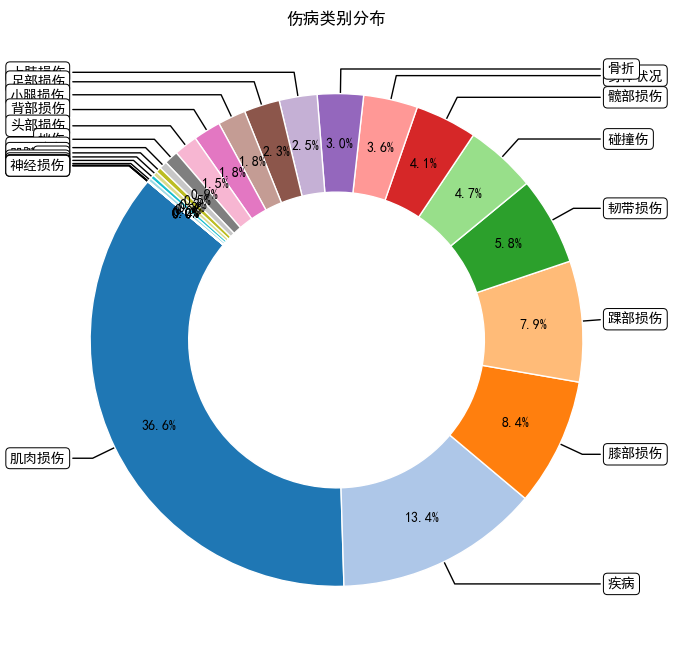

In [29]:
# 假设 summary 是你的原始数据 DataFrame
df = summary

# 删除含有 "-" 和 "未知伤病" 的行
df = df[(df['injury category'] != '-') & (df['injury category'] != '未知伤病')]

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 画饼图
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    df['total frequency'], 
    autopct='%1.1f%%', 
    startangle=140, 
    pctdistance=0.8,
    colors=plt.cm.tab20.colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# 清理默认标签
for text in texts:
    text.set_visible(False)

# 标签和箭头
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(
        df['injury category'].iloc[i],  # 用 iloc 确保索引正确
        xy=(x*0.7, y*0.7), 
        xytext=(1.1*np.sign(x), 1.1*y),
        horizontalalignment=horizontalalignment, **kw)

plt.title("伤病类别分布")
plt.savefig(f"./saved/伤病类别分布.png", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
from pyecharts.charts import Pie
from pyecharts import options as opts

# 排序数据
sorted_data = sorted(zip(summary['injury category'], summary['average/day']), key=lambda x: x[1])
formatted_data = [(category, round(value, 2)) for category, value in sorted_data]   # 保留两位小数


pie = Pie()
pie.add(
    "",
    [list(z) for z in formatted_data],
    radius=["20%", "75%"],
    rosetype="radius",
    center=["40%", "50%"]
)

# 设置全局选项
pie.set_global_opts(
    title_opts=opts.TitleOpts(title="伤病玫瑰图-平均天数"),
    tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{b}: {c}  天"),  # 提示框显示
    legend_opts=opts.LegendOpts(
        orient="vertical",   # 设置为垂直布局
        pos_top="middle",    # 设置图例位置靠近顶部
        pos_left="80%",    # 设置图例位置靠右
        item_gap=10,         # 设置图例项之间的间距
        padding=[0, 20, 0, 0]  # 调整图例与饼图之间的间距（上右下左）
    ),
)

# 设置标签的显示选项
pie.set_series_opts(
    label_opts=opts.LabelOpts(
        is_show=True,
        position="outside",  # 标签显示在外部
        font_size=12,         # 字体大小
        formatter="{b}" # 显示标签为分类
    )
)

pie.render("./saved/伤病玫瑰图-平均天数.html")

# 在notebook中显示
pie.render_notebook()

In [31]:
# 排序数据
sorted_data = sorted(zip(summary['injury category'], summary['total frequency']), key=lambda x: x[1])

pie = Pie()
pie.add(
    "",
    [list(z) for z in sorted_data],
    radius=["20%", "75%"],
    rosetype="radius",
    center=["40%", "50%"]
)

# 设置全局选项
pie.set_global_opts(
    title_opts=opts.TitleOpts(title="伤病玫瑰图-频率"),
    tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{b}: {c} ({d}%)"),  # 提示框显示
    legend_opts=opts.LegendOpts(
        orient="vertical",   # 设置为垂直布局
        pos_top="middle",    # 设置图例位置靠近顶部
        pos_left="80%",      # 将图例放到饼图的右边，增加距离
        item_gap=10,         # 设置图例项之间的间距
        padding=[0, 20, 0, 0]  # 调整图例与饼图之间的间距（上右下左）
    ),
)

# 设置标签的显示选项
pie.set_series_opts(
    label_opts=opts.LabelOpts(
        is_show=True,
        position="outside",  # 标签显示在外部
        font_size=12,         # 字体大小
        formatter="{b}: {d}%" # 显示标签为分类和百分比
    )
)

pie.render("./saved/伤病玫瑰图-频率.html")

# 在notebook中显示
pie.render_notebook()

<br>

# 2.

### 导入球员对象 

In [32]:
from player import *
import json

with open("obj_list.json", "r", encoding='utf-8') as fp:
    obj_list = obj_list_from_json(json.load(fp))
    
with open("obj_dict.json", "r", encoding='utf-8') as fp:
    obj_dict = obj_dict_from_json(json.load(fp))

In [40]:
def inj_series(inj):
    return [d.days for d in inj]

data_list = obj_list.copy()
for p in data_list:
    p['injury_history'] = inj_series(p['injury_history'])

data_list

[{'name': 'Ederson',
  'position': 'Goalkeeper',
  'height': '1,88 m',
  'nationality': 'Brazil',
  'injury_history': [-1,
   '30 days',
   397,
   '3 days',
   785,
   '17 days',
   16,
   '7 days',
   16,
   '9 days',
   355,
   '17 days',
   1096,
   '8 days',
   50,
   '27 days',
   39,
   '76 days',
   145,
   '22 days',
   22,
   '10 days',
   32,
   '17 days',
   14,
   '13 days'],
  'apparence': (495, 44035)},
 {'name': 'Stefan Ortega',
  'position': 'Goalkeeper',
  'height': '1,85 m',
  'nationality': 'Germany',
  'injury_history': [-1,
   '54 days',
   447,
   '4 days',
   101,
   '5 days',
   2411,
   '28 days',
   451,
   '8 days',
   666,
   '15 days'],
  'apparence': (401, 35735)},
 {'name': 'Scott Carson',
  'position': 'Goalkeeper',
  'height': '1,88 m',
  'nationality': 'England',
  'injury_history': [-1, '9 days', 34, '17 days', 2837, '68 days'],
  'apparence': (522, 46879)},
 {'name': 'Rúben Dias',
  'position': 'Centre-Back',
  'height': '1,87 m',
  'nationality': '

In [39]:
data_list[1]['injury_history'][1].days

'54 days'

In [48]:
def convert_to_int(value):
    if isinstance(value, int):  # 如果是整数，直接返回
        return value
    elif isinstance(value, str):
        parts = value.split() 
        if len(parts) == 2 and parts[1] == 'days':  # 格式是 "X days"
            try:
                return int(parts[0]) 
            except ValueError:
                print(f"Invalid value encountered: {value}, returning 0")
                return 0  
        return int(value) 
    return value 

def convert_list_to_int(lst):
    return [convert_to_int(i) for i in lst]

for p in data_list:
    p['injury_history'] = convert_list_to_int(p['injury_history'])
    
data_list

Invalid value encountered: ? days, returning 0


[{'name': 'Ederson',
  'position': 'Goalkeeper',
  'height': '1,88 m',
  'nationality': 'Brazil',
  'injury_history': [-1,
   30,
   397,
   3,
   785,
   17,
   16,
   7,
   16,
   9,
   355,
   17,
   1096,
   8,
   50,
   27,
   39,
   76,
   145,
   22,
   22,
   10,
   32,
   17,
   14,
   13],
  'apparence': (495, 44035)},
 {'name': 'Stefan Ortega',
  'position': 'Goalkeeper',
  'height': '1,85 m',
  'nationality': 'Germany',
  'injury_history': [-1, 54, 447, 4, 101, 5, 2411, 28, 451, 8, 666, 15],
  'apparence': (401, 35735)},
 {'name': 'Scott Carson',
  'position': 'Goalkeeper',
  'height': '1,88 m',
  'nationality': 'England',
  'injury_history': [-1, 9, 34, 17, 2837, 68],
  'apparence': (522, 46879)},
 {'name': 'Rúben Dias',
  'position': 'Centre-Back',
  'height': '1,87 m',
  'nationality': 'Portugal',
  'injury_history': [-1,
   29,
   95,
   11,
   1435,
   40,
   255,
   25,
   654,
   33,
   19,
   30,
   6,
   15,
   6,
   5],
  'apparence': (425, 36453)},
 {'name': 'Abd

In [62]:
df = pd.json_normalize(data_list)
df

name            position  height  \
0                      Ederson          Goalkeeper  1,88 m   
1                Stefan Ortega          Goalkeeper  1,85 m   
2                 Scott Carson          Goalkeeper  1,88 m   
3                   Rúben Dias         Centre-Back  1,87 m   
4           Abdukodir Khusanov         Centre-Back  1,86 m   
5                   Nathan Aké         Centre-Back  1,80 m   
6                Manuel Akanji         Centre-Back  1,88 m   
7                  John Stones         Centre-Back  1,88 m   
8                   Vitor Reis         Centre-Back  1,86 m   
9               Josko Gvardiol           Left-Back  1,85 m   
10                  Rico Lewis          Right-Back  1,70 m   
11                       Rodri  Defensive Midfield  1,91 m   
12               Nico González    Central Midfield  1,88 m   
13               Matheus Nunes    Central Midfield  1,83 m   
14               Mateo Kovacic    Central Midfield  1,77 m   
15              İlkay Gündoğan    Central Midfield  1,80 m   
16              Bernardo Silva  Attacking Midfield  1,73 m   
17             Kevin De Bruyne  Attacking Midfield  1,81 m   
18           Claudio Echeverri  Attacking Midfield  1,70 m   
19                James McAtee  Attacking Midfield  1,80 m   
20               Nico O'Reilly  Attacking Midfield  1,93 m   
21                 Jérémy Doku         Left Winger  1,73 m   
22               Jack Grealish         Left Winger  1,80 m   
23                  Phil Foden        Right Winger  1,71 m   
24                     Savinho        Right Winger  1,76 m   
25                  Oscar Bobb        Right Winger  1,75 m   
26              Erling Haaland      Centre-Forward  1,95 m   
27               Omar Marmoush      Centre-Forward  1,83 m   
28                  David Raya          Goalkeeper  1,83 m   
29                        Neto          Goalkeeper  1,90 m   
30              William Saliba         Centre-Back  1,92 m   
31           Gabriel Magalhães         Centre-Back  1,90 m   
32                Jakub Kiwior         Centre-Back  1,89 m   
33          Riccardo Calafiori           Left-Back  1,88 m   
34          Myles Lewis-Skelly           Left-Back  1,78 m   
35         Oleksandr Zinchenko           Left-Back  1,75 m   
36              Kieran Tierney           Left-Back  1,80 m   
37                   Ben White          Right-Back  1,86 m   
38              Jurrien Timber          Right-Back  1,79 m   
39           Takehiro Tomiyasu          Right-Back  1,88 m   
40               Thomas Partey  Defensive Midfield  1,85 m   
41                    Jorginho  Defensive Midfield  1,78 m   
42                 Declan Rice    Central Midfield  1,88 m   
43                Mikel Merino    Central Midfield  1,89 m   
44             Martin Ødegaard  Attacking Midfield  1,78 m   
45          Gabriel Martinelli         Left Winger  1,78 m   
46            Leandro Trossard         Left Winger  1,72 m   
47                 Bukayo Saka        Right Winger  1,78 m   
48               Ethan Nwaneri        Right Winger  1,76 m   
49             Raheem Sterling        Right Winger  1,70 m   
50                 Kai Havertz      Centre-Forward  1,93 m   
51               Gabriel Jesus      Centre-Forward  1,75 m   
52                     Alisson          Goalkeeper  1,93 m   
53           Caoimhín Kelleher          Goalkeeper  1,88 m   
54             Vitezslav Jaros          Goalkeeper  1,90 m   
55               Harvey Davies          Goalkeeper  1,90 m   
56             Ibrahima Konaté         Centre-Back  1,94 m   
57             Virgil van Dijk         Centre-Back  1,95 m   
58                   Joe Gomez         Centre-Back  1,88 m   
59              Jarell Quansah         Centre-Back  1,90 m   
60       Konstantinos Tsimikas           Left-Back  1,79 m   
61            Andrew Robertson           Left-Back  1,78 m   
62      Trent Alexander-Arnold          Right-Back  1,75 m   
63               Conor Bradley          Right-Back  1,81 m

In [63]:
df['height'] = df['height'].replace('-', np.nan)  # 身高未知的标记为nan
df['height'] = df['height'].str.replace(' m', '').str.replace(',', '.').astype(float)   # 身高列转化为数值
df['height'] = pd.to_numeric(df['height'], errors='coerce')
df.rename(columns={'height': 'height/m'}, inplace=True)  # 重命名列

average_height = df['height/m'].mean()  # 平均身高
average_height

1.8362077012835474

In [87]:
df.to_csv('./saved/players.csv', index=False)
df

name            position  height/m  \
0                      Ederson          Goalkeeper      1.88   
1                Stefan Ortega          Goalkeeper      1.85   
2                 Scott Carson          Goalkeeper      1.88   
3                   Rúben Dias         Centre-Back      1.87   
4           Abdukodir Khusanov         Centre-Back      1.86   
5                   Nathan Aké         Centre-Back      1.80   
6                Manuel Akanji         Centre-Back      1.88   
7                  John Stones         Centre-Back      1.88   
8                   Vitor Reis         Centre-Back      1.86   
9               Josko Gvardiol           Left-Back      1.85   
10                  Rico Lewis          Right-Back      1.70   
11                       Rodri  Defensive Midfield      1.91   
12               Nico González    Central Midfield      1.88   
13               Matheus Nunes    Central Midfield      1.83   
14               Mateo Kovacic    Central Midfield      1.77   
15              İlkay Gündoğan    Central Midfield      1.80   
16              Bernardo Silva  Attacking Midfield      1.73   
17             Kevin De Bruyne  Attacking Midfield      1.81   
18           Claudio Echeverri  Attacking Midfield      1.70   
19                James McAtee  Attacking Midfield      1.80   
20               Nico O'Reilly  Attacking Midfield      1.93   
21                 Jérémy Doku         Left Winger      1.73   
22               Jack Grealish         Left Winger      1.80   
23                  Phil Foden        Right Winger      1.71   
24                     Savinho        Right Winger      1.76   
25                  Oscar Bobb        Right Winger      1.75   
26              Erling Haaland      Centre-Forward      1.95   
27               Omar Marmoush      Centre-Forward      1.83   
28                  David Raya          Goalkeeper      1.83   
29                        Neto          Goalkeeper      1.90   
30              William Saliba         Centre-Back      1.92   
31           Gabriel Magalhães         Centre-Back      1.90   
32                Jakub Kiwior         Centre-Back      1.89   
33          Riccardo Calafiori           Left-Back      1.88   
34          Myles Lewis-Skelly           Left-Back      1.78   
35         Oleksandr Zinchenko           Left-Back      1.75   
36              Kieran Tierney           Left-Back      1.80   
37                   Ben White          Right-Back      1.86   
38              Jurrien Timber          Right-Back      1.79   
39           Takehiro Tomiyasu          Right-Back      1.88   
40               Thomas Partey  Defensive Midfield      1.85   
41                    Jorginho  Defensive Midfield      1.78   
42                 Declan Rice    Central Midfield      1.88   
43                Mikel Merino    Central Midfield      1.89   
44             Martin Ødegaard  Attacking Midfield      1.78   
45          Gabriel Martinelli         Left Winger      1.78   
46            Leandro Trossard         Left Winger      1.72   
47                 Bukayo Saka        Right Winger      1.78   
48               Ethan Nwaneri        Right Winger      1.76   
49             Raheem Sterling        Right Winger      1.70   
50                 Kai Havertz      Centre-Forward      1.93   
51               Gabriel Jesus      Centre-Forward      1.75   
52                     Alisson          Goalkeeper      1.93   
53           Caoimhín Kelleher          Goalkeeper      1.88   
54             Vitezslav Jaros          Goalkeeper      1.90   
55               Harvey Davies          Goalkeeper      1.90   
56             Ibrahima Konaté         Centre-Back      1.94   
57             Virgil van Dijk         Centre-Back      1.95   
58                   Joe Gomez         Centre-Back      1.88   
59              Jarell Quansah         Centre-Back      1.90   
60       Konstantinos Tsimikas           Left-Back      1.79   
61            Andrew Robertson           Left-Back      1.

In [64]:
df[df.isna().any(axis=1)]

name            position  height/m    nationality  \
305            Caleb Kporha          Right-Back       NaN        England   
310            Kaden Rodney  Defensive Midfield       NaN        England   
457          Cieran Slicker          Goalkeeper       NaN       Scotland   
636   Arkaitz Mariezkurrena         Left Winger       NaN          Spain   
890              Omar Sadik      Centre-Forward       NaN        Morocco   
925        Ismael Bekhoucha          Right-Back       NaN        Morocco   
931           Alberto Risco  Attacking Midfield       NaN          Spain   
1034           Yan Diomande         Left Winger       NaN  Cote d'Ivoire   
1068        Luca Novodomsky          Goalkeeper       NaN        Germany   
1258        Bazoumana Touré         Left Winger       NaN  Cote d'Ivoire   
1363          Patrice Covic  Attacking Midfield       NaN        Croatia   
1650           Claudio Turi          Goalkeeper       NaN          Italy   
1894          David Pejičić  Attacking Midfield       NaN       Slovenia   
2056           Elijah Scott         Centre-Back       NaN        Germany   
2120              Axel Tape         Centre-Back       NaN         France   
2135          Ibrahim Mbaye        Right Winger       NaN         France   
2156           Lucas Michal         Left Winger       NaN         France   
2238            Enzo Molebe      Centre-Forward       NaN         France   
2534      Djylian N'Guessan      Centre-Forward       NaN         France   
2561           Glenn Ngosso      Centre-Forward       NaN       Cameroon   

     injury_history    apparence  
305            [-1]   (38, 2871)  
310            [-1]  (100, 7966)  
457        [-1, 15]   (62, 5387)  
636            [-1]   (91, 4719)  
890       [-1, 142]   (44, 2664)  
925            [-1]   (67, 3673)  
931            [-1]    (18, 401)  
1034           [-1]    (10, 542)  
1068           [-1]   (20, 1733)  
1258           [-1]   (38, 2337)  
1363        [-1, 4]   (51, 4430)  
1650           [-1]   (89, 8036)  
1894        [-1, 6]   (82, 5785)  
2056           [-1]   (45, 3267)  
2120           [-1]   (22, 1790)  
2135       [-1, 29]   (46, 2914)  
2156           [-1]   (54, 3537)  
2238           [-1]   (27, 1763)  
2534           [-1]   (28, 1416)  
2561      [-1, 264]    (12, 986)

In [88]:
df_filled = df.fillna({'height': average_height})
df_filled.to_csv('./saved/players_filled.csv', index=False)
df_filled

name            position  height/m  \
0                      Ederson          Goalkeeper      1.88   
1                Stefan Ortega          Goalkeeper      1.85   
2                 Scott Carson          Goalkeeper      1.88   
3                   Rúben Dias         Centre-Back      1.87   
4           Abdukodir Khusanov         Centre-Back      1.86   
5                   Nathan Aké         Centre-Back      1.80   
6                Manuel Akanji         Centre-Back      1.88   
7                  John Stones         Centre-Back      1.88   
8                   Vitor Reis         Centre-Back      1.86   
9               Josko Gvardiol           Left-Back      1.85   
10                  Rico Lewis          Right-Back      1.70   
11                       Rodri  Defensive Midfield      1.91   
12               Nico González    Central Midfield      1.88   
13               Matheus Nunes    Central Midfield      1.83   
14               Mateo Kovacic    Central Midfield      1.77   
15              İlkay Gündoğan    Central Midfield      1.80   
16              Bernardo Silva  Attacking Midfield      1.73   
17             Kevin De Bruyne  Attacking Midfield      1.81   
18           Claudio Echeverri  Attacking Midfield      1.70   
19                James McAtee  Attacking Midfield      1.80   
20               Nico O'Reilly  Attacking Midfield      1.93   
21                 Jérémy Doku         Left Winger      1.73   
22               Jack Grealish         Left Winger      1.80   
23                  Phil Foden        Right Winger      1.71   
24                     Savinho        Right Winger      1.76   
25                  Oscar Bobb        Right Winger      1.75   
26              Erling Haaland      Centre-Forward      1.95   
27               Omar Marmoush      Centre-Forward      1.83   
28                  David Raya          Goalkeeper      1.83   
29                        Neto          Goalkeeper      1.90   
30              William Saliba         Centre-Back      1.92   
31           Gabriel Magalhães         Centre-Back      1.90   
32                Jakub Kiwior         Centre-Back      1.89   
33          Riccardo Calafiori           Left-Back      1.88   
34          Myles Lewis-Skelly           Left-Back      1.78   
35         Oleksandr Zinchenko           Left-Back      1.75   
36              Kieran Tierney           Left-Back      1.80   
37                   Ben White          Right-Back      1.86   
38              Jurrien Timber          Right-Back      1.79   
39           Takehiro Tomiyasu          Right-Back      1.88   
40               Thomas Partey  Defensive Midfield      1.85   
41                    Jorginho  Defensive Midfield      1.78   
42                 Declan Rice    Central Midfield      1.88   
43                Mikel Merino    Central Midfield      1.89   
44             Martin Ødegaard  Attacking Midfield      1.78   
45          Gabriel Martinelli         Left Winger      1.78   
46            Leandro Trossard         Left Winger      1.72   
47                 Bukayo Saka        Right Winger      1.78   
48               Ethan Nwaneri        Right Winger      1.76   
49             Raheem Sterling        Right Winger      1.70   
50                 Kai Havertz      Centre-Forward      1.93   
51               Gabriel Jesus      Centre-Forward      1.75   
52                     Alisson          Goalkeeper      1.93   
53           Caoimhín Kelleher          Goalkeeper      1.88   
54             Vitezslav Jaros          Goalkeeper      1.90   
55               Harvey Davies          Goalkeeper      1.90   
56             Ibrahima Konaté         Centre-Back      1.94   
57             Virgil van Dijk         Centre-Back      1.95   
58                   Joe Gomez         Centre-Back      1.88   
59              Jarell Quansah         Centre-Back      1.90   
60       Konstantinos Tsimikas           Left-Back      1.79   
61            Andrew Robertson           Left-Back      1.

[0, 47, 38, 26, 346, 5, 52, 1, 25, 15, 45, 5, 35, 8, 108, 15, 77, 15, 116, 266, 96, 5, -3, 3, 40, 5, 217, 3, 155, 5, 2, 7, 152, 3, 143, 30]
[0, 47, 85, 111, 457, 462, 514, 515, 540, 555, 600, 605, 640, 648, 756, 771, 848, 863, 979, 1245, 1341, 1346, 1343, 1346, 1386, 1391, 1608, 1611, 1766, 1771, 1773, 1780, 1932, 1935, 2078, 2108]


ValueError: x and y must have same first dimension, but have shapes (2109,) and (2111,)

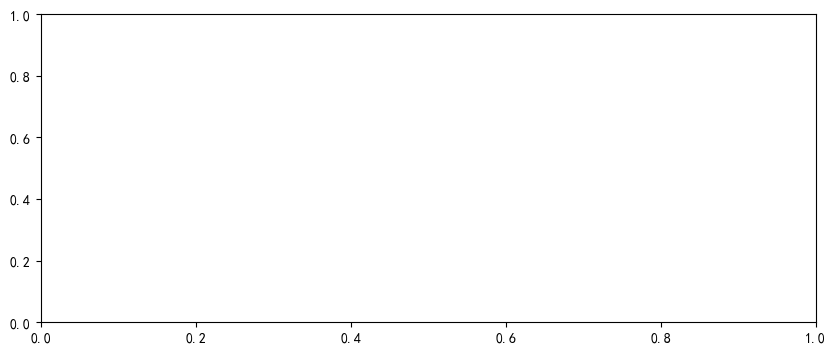

In [96]:
data = df_filled['injury_history'][1083]
data[0] = 0

it = iter(data)

y=0
path_len=0
leng = next(it)
for x in range(sum(data)):
    if path_len == leng:
        leng = next(it)
        path_len
        y = -y

# 绘制图形
plt.figure(figsize=(10,4)) 
plt.plot(range(0, ends[-1] + 1), y)
plt.xlabel('Days')
plt.ylabel('Injury Status (1: Injury, 0: Healthy)')
plt.title('Injury Timeline')
plt.show()

In [90]:
df[df['name'].str.startswith('Florian Wirtz', na=False)]

name            position  height/m nationality  \
1083  Florian Wirtz  Attacking Midfield      1.77     Germany   

                                         injury_history     apparence  
1083  [-1, 47, 38, 26, 346, 5, 52, 1, 25, 15, 45, 5,...  (225, 16558)

In [103]:
obj_dict['Bundesliga']['Florian Wirtz']['injury_history']

[Healthy(days=-1),
 Injured(days='47 days', injury='Outer ligament tear', games_missed='5'),
 Healthy(days=38),
 Injured(days='26 days', injury='Knock', games_missed='6'),
 Healthy(days=346),
 Injured(days='5 days', injury='Abdominal muscle strain', games_missed='1'),
 Healthy(days=52),
 Injured(days='1 days', injury='Rest', games_missed='1'),
 Healthy(days=25),
 Injured(days='15 days', injury='Knee problems', games_missed='3'),
 Healthy(days=45),
 Injured(days='5 days', injury='Corona virus', games_missed='1'),
 Healthy(days=35),
 Injured(days='8 days', injury='Adductor pain', games_missed='2'),
 Healthy(days=108),
 Injured(days='15 days', injury='Adductor pain', games_missed='2'),
 Healthy(days=77),
 Injured(days='15 days', injury='Hip flexor problems', games_missed='4'),
 Healthy(days=116),
 Injured(days='266 days', injury='Cruciate ligament tear', games_missed='43'),
 Healthy(days=96),
 Injured(days='5 days', injury='muscular problems', games_missed='1'),
 Healthy(days=-3),
 Injure

发现其中有负值。<br>
应该是网站中表格顺序出现了异常。<br>
太不幸了。现在还需要把它筛选出来。

In [117]:
def has_negative_int(lst):
    for num in lst:
        if isinstance(num, int) and num < 0:
            print(num, len(lst))
            return True
    return False


df_filt_neg = df[df['injury_history'].apply(lambda l:has_negative_int(l[1:]))]
print(len(df_filt_neg))
df_filt_neg

-23 31
-3 45
-52 7
-94 21
-2 23
-4 41
-60 5
-19 25
-37 23
-112 57
-53 37
-102 49
-77 23
-28 15
-2 21
-24 23
-12 17
-3 15
-2 21
-9 7
-25 27
-9 37
-27 29
-1 29
-34 13
-29 7
-17 11
-44 17
-3 45
-17 23
-3 29
-45 31
-39 17
-47 13
-8 7
-25 45
-4 43
-7 91
-42 47
-3 27
-4 33
-2 61
-7 21
-126 31
-7 13
-4 45
-2 15
-112 19
-14 13
-7 15
-14 49
-21 53
-3 29
-3 33
-82 11
-13 33
-9 29
-13 25
-21 3
-21 15
-32 11
-132 19
-20 15
-26 7
-24 17
-3 29
-4 93
-53 97
-4 83
-14 45
-7 5
-3 35
-133 5
-3 91
-4 57
-14 5
-43 41
-3 59
-4 17
-11 23
-10 31
-6 75
-3 33
-3 11
-32 43
-28 25
-14 13
-21 33
-4 73
-24 23
-4 67
-7 53
-7 31
-3 47
-7 25
-3 83
-2 17
-28 11
-35 19
-42 11
-117 23
-5 23
-10 11
-41 13
-15 19
-22 11
-2 21
-10 15
-4 59
-2 11
-11 45
-4 61
-4 35
-11 31
-1 25
-15 27
-10 27
-3 21
-4 21
-4 63
-2 3
-109 29
-133 49
-3 7
-4 37
-29 7
-29 71
-42 7
-32 25
-135 7
-17 27
-13 25
-41 7
-3 21
-3 29
-31 9
-3 7
-21 47
-112 31
-16 13
-1 35
-67 17
-2 43
-39 29
-13 29
-10 13
-152 19
-1 7
-7 51
-53 7
-38 19
-164 43
-26 45
-

name            position  height/m     nationality  \
52                Alisson          Goalkeeper      1.93          Brazil   
74        Federico Chiesa        Right Winger      1.75           Italy   
77         Robert Sánchez          Goalkeeper      1.97           Spain   
83      Benoît Badiashile         Centre-Back      1.94          France   
85        Trevoh Chalobah         Centre-Back      1.92         England   
89            Reece James          Right-Back      1.80         England   
97         Omari Kellyman  Attacking Midfield      1.91         England   
104    Christopher Nkunku      Centre-Forward      1.77          France   
133       Dominic Solanke      Centre-Forward      1.86         England   
148             Luke Shaw           Left-Back      1.78         England   
172      Jamaal Lascelles         Centre-Back      1.88         England   
221          Adam Webster         Centre-Back      1.90         England   
225      Pervis Estupiñán           Left-Back      1.75         Ecuador   
229          Mats Wieffer  Defensive Midfield      1.88     Netherlands   
238          Brajan Gruda        Right Winger      1.78         Germany   
247     Jean-Clair Todibo         Centre-Back      1.90          France   
272       Wayne Hennessey          Goalkeeper      1.98           Wales   
274     Nikola Milenković         Centre-Back      1.95          Serbia   
277           Álex Moreno           Left-Back      1.79           Spain   
282                Danilo  Defensive Midfield      1.77          Brazil   
288    Callum Hudson-Odoi         Left Winger      1.78         England   
302          Ben Chilwell           Left-Back      1.80         England   
342          David Brooks        Right Winger      1.73           Wales   
350       Kristoffer Ajer         Centre-Back      1.98          Norway   
355            Rico Henry           Left-Back      1.70         England   
363          Josh Dasilva    Central Midfield      1.84         England   
366        Fábio Carvalho  Attacking Midfield      1.70        Portugal   
406    Jarrad Branthwaite         Centre-Back      1.95         England   
413        Séamus Coleman          Right-Back      1.77         Ireland   
432             Issa Diop         Centre-Back      1.94          France   
440         Harrison Reed    Central Midfield      1.81         England   
443      Emile Smith Rowe  Attacking Midfield      1.82         England   
475       Jaden Philogene         Left Winger      1.81         England   
494          Ryan Manning           Left-Back      1.73         Ireland   
538         Kasey McAteer        Right Winger      1.77         Ireland   
542      Thibaut Courtois          Goalkeeper      2.00         Belgium   
547       Antonio Rüdiger         Centre-Back      1.90         Germany   
548           David Alaba         Centre-Back      1.80         Austria   
549         Jesús Vallejo         Centre-Back      1.84           Spain   
561               Rodrygo        Right Winger      1.74          Brazil   
570         Ronald Araujo         Centre-Back      1.92         Uruguay   
573        Iñigo Martínez         Centre-Back      1.82           Spain   
580                 Pedri    Central Midfield      1.74           Spain   
582       Frenkie de Jong    Central Midfield      1.81     Netherlands   
589         Ferran Torres      Centre-Forward      1.84           Spain   
590    Robert Lewandowski      Centre-Forward      1.85          Poland   
592             Jan Oblak          Goalkeeper      1.88        Slovenia   
606       Marcos Llorente      Right Midfield      1.84           Spain   
611          Ángel Correa        Right Winger      1.71       Argentina   
614     Antoine Griezmann      Centre-Forward      1.76          France   
651       Óscar de Marcos          Right-Back      1.82           Spain   
670           Eric Bailly         Centre-Back      1.87   Cote d'Ivoire   
680          Denis Suárez  Attacking Midfield 

结果发现有负值的还不少，而且很多都是长度很大的数据，所以要返回去将其排序。

git push 一下以做记录
....